<a href="https://colab.research.google.com/github/andreviniciusmb/teste-vetta/blob/main/Auditoria_Energetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Código para conectar o drive com o colab, desde maneira, podemos importar os datasets armazenados no drive.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Auditória Energética
*Esse projeto tem como <b>objetivo gerar importantes insights</b> para a Arnis sobre a plataforma Viridis, de modo que ela perceba como a plataforma pode ajudar a <b>reduzir o consumo de energia, melhorar a eficiência energética, reduzir custos e, o mais importante, reduzir o impacto ambiental de seus operações, criando valor no curto e no longo prazo</b>. \
Incialmente começarei importando algumas <b>bibliotecas</b> que serão importantes para o desenvolvimento do projeto, que são elas: <b>Pandas</b>, essa biblioteca servirá principalmente para a parte de ETL (Extração, transformação e carga dos dados) ou seja, manipulação dos dados. Usaremos também as bibliotecas: <b>Matplotlib</b> e <b>Seaborn</b>, elas permitiram que façamos o uso de gráficos e componentes visuais.*

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

*Agora, importaremos os datasets e faremos uma análise de algumas informações básicas do dataset como, tamanho, colunas, quais dados são categóricos, quais são numéricos, compos com valores nulos e uma descrição.*

In [21]:
dados_materia_prima = pd.read_csv('drive/My Drive/teste-vetta/datasets/raw_material_data.csv')
dados_forno = pd.read_csv('drive/My Drive/teste-vetta/datasets/furnace_data.csv')

*Abaixo temos uma legenda de algumas colunas utilizadas no dataset.*
* ID:	id unico
* RawMaterialType1:	Tipo de materia prima 1
* RawMaterialType2:	Tipo de materia prima 2
* ChargeMaterial_Type99:	Quantidade carregada do tipo de materia prima não registrada (diferente da 1 e 2)
* ChargeMaterial_Type1:	Quantidade carregada do tipo de materia prima 1
* ChargeMaterial_Type2:	Quantidade carregada do tipo de materia prima 2
* TotalCharge_sumAllTypes:	Carregamento Total (Deve ser igual à soma dos carregamentos, mas 
* FinalHeatWeight:	Quantidade de Materia Prima que foi convertida em aço
* Yield:	Rendimento
* Tap_to_Tap:	Tempo total da corrida (corrida = tempo que este ID levou para acontecer)
* Power_ON:	Tempo em que o forno estava ligado
* Power_OFF:	Tempo em que o forno estava desligado
* kWh_per_ton:	Kilowatt hora de energia elétrica por tonelada
* NaturalGas_Nm3_t:	Normal Metro cúbico de gás natural por tonelada
* Oxygen_Nm3_t:	Normal Metro cúbico de oxigênio por tonelada
* Carbon_kg_t:	Kilograma de carbono injetado por tonelada
* InitalTemperature:	Temperatura inicial do forno
* RawMaterial_InitialTemperature:	Temperatura inicial da materia prima
* ProductionDate:	Data

## Analisando o dataset sobre matéria-prima
*Comaçaremos pelo dataset sobre a materia-prima utilizada na empresa. Temos um dataset com <b>677 linhas e 6 colunas</b>, abaixo temos o nome das colunas utilizadas no dataset e uma visão de algumas linhas do dataset.*

In [ ]:
print('Linhas: {} - Colunas: {}'.format(dados_materia_prima.shape[0],dados_materia_prima.shape[1]))
print('Colunas: ' , dados_materia_prima.columns)
dados_materia_prima.head()

Linhas: 677 - Colunas: 6
Colunas:  Index(['Date', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4',
       'Feature 5'],
      dtype='object')


,Date,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,2019-01-01 23:00:00,89.816109,85.691910,97.518526,2.060734,6.905721
1,2019-01-02 23:00:00,89.615403,84.946413,96.886647,2.550413,6.996453
2,2019-01-03 02:00:00,89.625438,85.016933,96.956222,2.550413,2.583849
3,2019-01-04 23:00:00,89.705721,85.228493,97.110505,2.570817,2.576792
4,2019-01-05 23:00:00,89.946569,85.500499,97.159572,2.407590,2.572759


*Aqui, estarei olhando as <b>informações</b> das colunas do dataset relacionado com <b>matéria prima</b>. Podemos ver que temos uma coluna do tipo object, uma variável categórica e o restante das colunas são variáveis contínuas do tipo float.*

In [ ]:
dados_materia_prima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       676 non-null    object 
 1   Feature 1  672 non-null    float64
 2   Feature 2  672 non-null    float64
 3   Feature 3  672 non-null    float64
 4   Feature 4  673 non-null    float64
 5   Feature 5  358 non-null    float64
dtypes: float64(5), object(1)
memory usage: 31.9+ KB


*Usaremos agora, o método <b>describe</b> para visualizarmos algumas informações como média, mediana, quantidade, maior valor, dentre outras... \
Em uma análise inicial, podemos ver que o <b>valor médio</b> das features 1,2 e 3 se encontram próximos, e também apresentam um <b>desvio padrão pequeno</b>, indicando uma distribuição com valores próximos, sem muita variação. E por último, percebemos que a <b>feature 5</b>, apresenta mais da metade dos <b>dados faltantes</b>, logo, caso formos construir um modelo e essa variável for utilizada precisamos ou tirá-la ou imputar valores seguindo alguma técnica (média, mediana, valor padrão, moda...)*



In [ ]:
dados_materia_prima.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
count,672.000000,672.000000,672.000000,673.000000,358.000000
mean,90.885662,86.210286,96.950231,2.175059,4.773507
std,1.049032,1.458945,0.870144,0.239721,0.758966
min,87.317315,70.520030,82.549350,1.530248,2.156400
25%,89.863777,85.125231,96.531648,2.019927,4.554751
50%,90.709253,86.135179,96.943734,2.162750,4.684297
75%,91.923526,87.336538,97.434197,2.346380,4.867777
max,92.826705,89.187689,98.375144,2.815656,7.631578


*Já na célula abaixo, estamos olhando somente a coluna categórica Date, vimos que <b>grande parte das informações são únicas</b>, ou seja, cada informação foi coletada em determinado horário e data. Vimos também que a <b>última informação coletada</b> foi no dia 15/10/2019 às 23h.*

In [ ]:
dados_materia_prima.describe(include=[object])

,Date
count,676
unique,672
top,2019-10-15 23:00:00
freq,2


*Podemos ver abaixo que a coluna com mais valores nulos é <b>Feature 5</b>.*

In [ ]:
dados_materia_prima.isnull().sum().sort_values()

Date           1
Feature 4      4
Feature 1      5
Feature 2      5
Feature 3      5
Feature 5    319
dtype: int64

*Aqui, plotaremos uma tabela de correlação entre as variáveis. Percebemos que <b>Feature 1 e feature 2</b> e <b>Feature 2 e feature 3</b> possuem uma forte correlação positiva entre si.*

In [ ]:
dados_materia_prima.corr()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
Feature 1,1.000000,0.874653,0.365246,-0.424461,-0.143191
Feature 2,0.874653,1.000000,0.770615,-0.395325,-0.068514
Feature 3,0.365246,0.770615,1.000000,-0.196996,0.059375
Feature 4,-0.424461,-0.395325,-0.196996,1.000000,-0.064534
Feature 5,-0.143191,-0.068514,0.059375,-0.064534,1.000000


*E para finalizar essa parte de análise incial no dataset sobre as matérias primas, plotarei um gráfico para visualizar a relação entre as variáveis. \
<b>Informações visualizadas:</b>*

*   A distribuição da variável <b> Feature 4</b> se assemelha a uma distruição normal
*   Temos um <b>possível outlier</b> em Feature 1, Feature 2 e Feature 3
* E a variável <b>Feature 5</b> pode ser divida em 2 grupos.

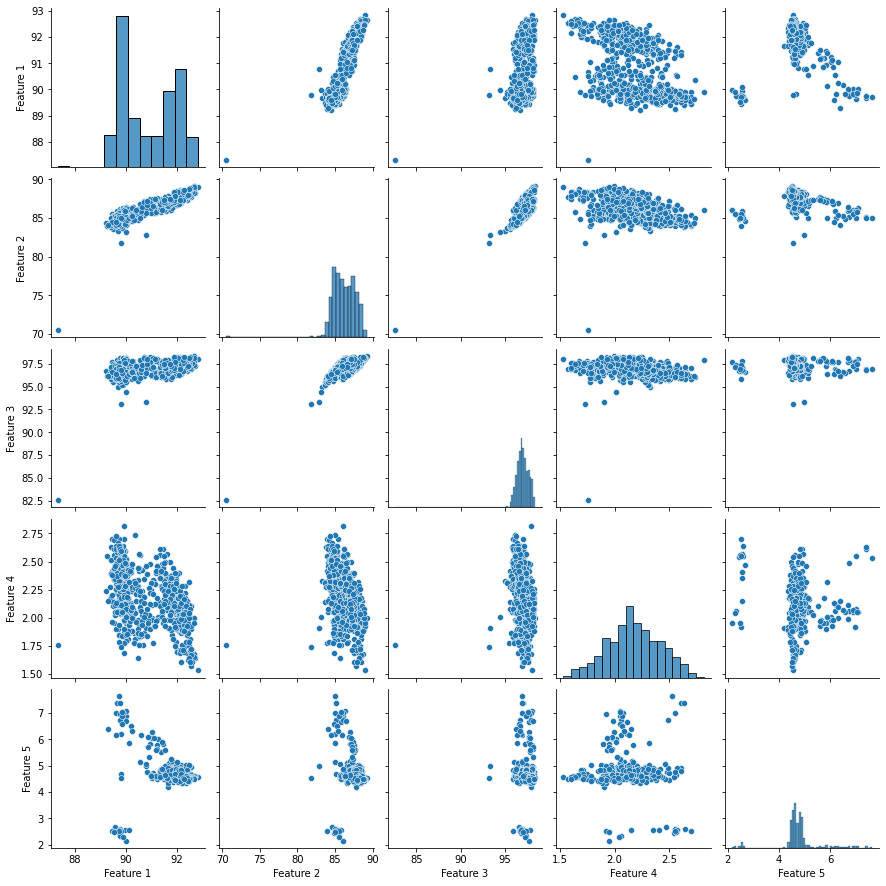

In [ ]:
sns.pairplot(dados_materia_prima)

## Analisando o dataset sobre o forno
*Comaçaremos pelo dataset sobre a materia-prima utilizada na empresa. Temos um dataset com <b>16.723 linhas e 19 colunas</b>, abaixo temos o nome das colunas utilizadas no dataset e uma visão de algumas linhas do dataset.*

In [ ]:
print('Linhas: {} - Colunas: {}'.format(dados_forno.shape[0],dados_forno.shape[1]))
print('Colunas: ' , dados_forno.columns)
dados_forno.head()

Linhas: 16723 - Colunas: 19
Colunas:  Index(['Unnamed: 0', 'RawMaterialType1', 'RawMaterialType2',
       'ChargeMaterial_Type99', 'ChargeMaterial_Type1', 'ChargeMaterial_Type2',
       'TotalCharge_sumAllTypes', 'FinalHeatWeight', 'Yield', 'Tap_to_Tap',
       'Power_ON', 'Power_OFF', 'kWh_per_ton', 'NaturalGas_Nm3_t',
       'Oxygen_Nm3_t', 'Carbon_kg_t', 'InitalTemperature',
       'RawMaterial_InitialTemperature', 'ProductionDate'],
      dtype='object')


,Unnamed: 0,RawMaterialType1,RawMaterialType2,ChargeMaterial_Type99,ChargeMaterial_Type1,ChargeMaterial_Type2,TotalCharge_sumAllTypes,FinalHeatWeight,Yield,Tap_to_Tap,Power_ON,Power_OFF,kWh_per_ton,NaturalGas_Nm3_t,Oxygen_Nm3_t,Carbon_kg_t,InitalTemperature,RawMaterial_InitialTemperature,ProductionDate
0,0,RawMaterialHot3,NaN,22.620874,178.230034,NaN,200.850909,129.002979,64.228228,62.143001,57.607472,4.547516,623.286155,4.243831,61.894745,33.286255,1729.636046,463.353003,2019-01-01
1,1,RawMaterialHot3,NaN,NaN,167.424553,NaN,167.424553,130.020636,77.659241,48.447261,43.170218,5.422430,479.024764,2.063817,39.428434,23.405620,1696.228745,446.679316,2019-01-01
2,2,RawMaterialHot3,NaN,15.423323,126.397474,NaN,141.820797,132.604687,93.501580,106.037661,44.491274,65.771123,462.362279,2.700406,39.866427,28.714682,1735.024320,462.475441,2019-01-01
3,3,RawMaterialHot3,NaN,NaN,149.145804,NaN,149.145804,128.214794,85.966075,43.961052,38.810734,5.310522,426.540126,1.880451,36.993015,19.640511,1704.849984,452.822253,2019-01-01
4,4,RawMaterialHot3,NaN,NaN,149.189741,NaN,149.189741,130.230154,87.291628,43.866206,38.735245,5.290175,424.213267,1.834266,35.368881,17.568409,1681.141577,443.169066,2019-01-01


*Aqui, estarei olhando as <b>informações</b> das colunas do dataset relacionado com o <b>forno</b>. Podemos ver que temos uma coluna do tipo int, algumas variáveis categóricas e a maioria das colunas são variáveis contínuas do tipo float.*

In [ ]:
dados_forno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16723 entries, 0 to 16722
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      16723 non-null  int64  
 1   RawMaterialType1                15418 non-null  object 
 2   RawMaterialType2                4434 non-null   object 
 3   ChargeMaterial_Type99           2893 non-null   float64
 4   ChargeMaterial_Type1            15418 non-null  float64
 5   ChargeMaterial_Type2            4434 non-null   float64
 6   TotalCharge_sumAllTypes         16723 non-null  float64
 7   FinalHeatWeight                 16722 non-null  float64
 8   Yield                           16722 non-null  float64
 9   Tap_to_Tap                      16722 non-null  float64
 10  Power_ON                        16722 non-null  float64
 11  Power_OFF                       16722 non-null  float64
 12  kWh_per_ton                     

*Usaremos agora, o método <b>describe</b> para visualizarmos algumas informações como média, mediana, quantidade, maior valor, dentre outras... \
Em uma análise inicial, podemos ver que a variável KWh_per_ton, que representa a quantidade de Kilowatt hora de energia elétrica por tonelada possui uma alta amplitude e alto desvio padrão. Fato semelhante em ChargeMaterial_Type2, que representa a quantidade carregada do tipo de materia prima 2. Nessa situação podemos pensar em situações totalmente distintas em uma possível modelagem, falta de padronização, ou fator natural dos dados.*



In [ ]:
dados_forno.describe()

,Unnamed: 0,ChargeMaterial_Type99,ChargeMaterial_Type1,ChargeMaterial_Type2,TotalCharge_sumAllTypes,FinalHeatWeight,Yield,Tap_to_Tap,Power_ON,Power_OFF,kWh_per_ton,NaturalGas_Nm3_t,Oxygen_Nm3_t,Carbon_kg_t,InitalTemperature,RawMaterial_InitialTemperature
count,16723.000000,2893.000000,15418.000000,4434.000000,16723.000000,16722.000000,1.672200e+04,16722.000000,16722.000000,16722.000000,16721.000000,16720.000000,16720.000000,16715.000000,1.667900e+04,15330.000000
mean,8361.000000,30.119819,139.225726,59.942328,149.464998,130.044876,inf,49.677705,38.145490,12.159578,437.928714,2.347193,33.225345,15.892906,2.666787e+03,482.429025
std,4827.658611,8.080121,17.728929,63.449920,10.583663,3.746047,NaN,20.501712,5.271239,19.882501,58.865613,1.070382,4.857899,4.506370,1.257498e+05,25.508158
min,0.000000,5.141108,0.010984,0.000000,0.000000,0.000000,0.000000e+00,18.494941,1.868350,1.749827,14.383475,0.000000,7.481355,0.070061,-1.634802e+03,24.571750
25%,4180.500000,25.705539,133.675022,10.644075,146.310698,128.653783,8.500051e+01,41.333822,35.272192,5.310522,405.519992,1.650919,29.925280,12.614165,1.671443e+03,468.618378
50%,8361.000000,28.790204,145.906955,25.992596,149.343520,130.509511,8.728518e+01,44.122290,37.225467,6.912835,426.401579,2.084078,32.592379,15.487314,1.692996e+03,483.536941
75%,12541.500000,32.903090,149.520765,136.313442,151.751062,132.145743,8.960889e+01,52.430786,39.518443,11.261970,452.891844,2.932300,36.009927,18.210615,1.713471e+03,497.577941
max,16722.000000,112.076150,193.783697,195.997060,229.428572,149.505773,inf,708.517475,111.676401,639.572033,1060.401909,43.272752,88.269393,58.010129,1.624192e+07,555.497066


*Já na célula abaixo, vimos na coluna ProductionDate que <b>poucas informações são únicas</b> e a <b>última informação coletada</b> foi no dia 27/06/2020. Percebemos também que temos somente 2 tipos de matérias primas 1 e 2.*

In [ ]:
dados_forno.describe(include=[object])

,RawMaterialType1,RawMaterialType2,ProductionDate
count,15418,4434,16722
unique,2,2,690
top,RawMaterialHot1,RawMaterialCold3,2020-06-27
freq,7853,3050,33


*Podemos ver que a coluna com mais <b>valores faltantes</b> são: Charge Raw Material 99, Charge Raw Material 2, Raw Material 2, Slag Analysis B3, Slag Analysis B2.*

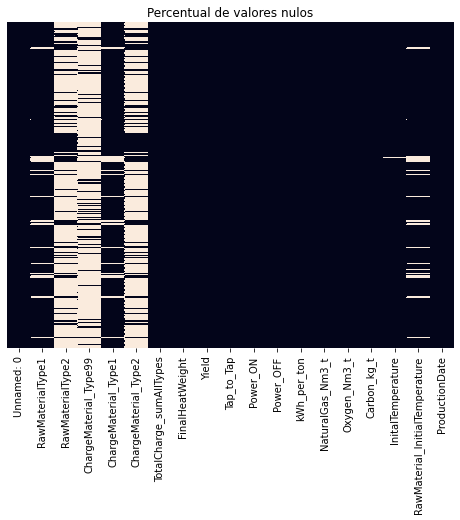

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(dados_forno.isnull(),yticklabels=False,cbar=False)
plt.title('Percentual de valores nulos')
plt.show()

In [ ]:
dados_forno.isnull().sum().sort_values(ascending=False)

ChargeMaterial_Type99             13830
ChargeMaterial_Type2              12289
RawMaterialType2                  12289
RawMaterial_InitialTemperature     1393
RawMaterialType1                   1305
ChargeMaterial_Type1               1305
InitalTemperature                    44
Carbon_kg_t                           8
Oxygen_Nm3_t                          3
NaturalGas_Nm3_t                      3
kWh_per_ton                           2
ProductionDate                        1
Tap_to_Tap                            1
FinalHeatWeight                       1
Yield                                 1
Power_ON                              1
Power_OFF                             1
TotalCharge_sumAllTypes               0
Unnamed: 0                            0
dtype: int64

*Aqui, plotaremos uma tabela de correlação entre as variáveis, usarei um gráfico para uma melhor visualização. Percebemos que uma forte correlação positiva entre:*
* *Quantidade carregada do tipo de materia prima do tipo 2 e o consumo de Kilowatt hora de energia elétrica por tonelada*
* *Carregamento Total e o consumo de Kilowatt hora de energia elétrica por tonelada*
* *Tempo em que o forno estava desligado e o Tempo total da corrida*
* *Tempo em que o forno estava ligado e o consumo de Kilowatt hora de energia elétrica por tonelada*

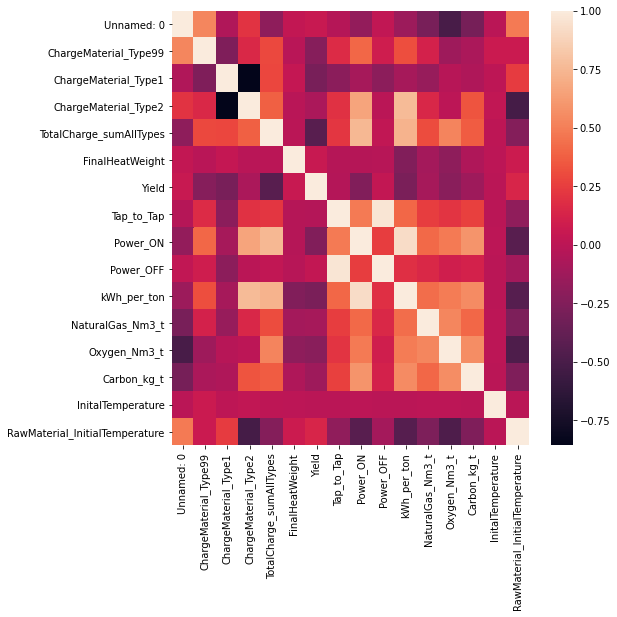

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(dados_forno.corr())

## Perguntas

### Quais variáveis se correlacionam com consumo de energia?
*O tempo em que o forno estava ligado <b>[Power ON, 0.92]</b>, quantidade carregada do tipo de materia prima 2 <b>[ChargeMaterial_Type2, 0.76]</b>, o carregamento total <b>[TotalCharge_sumAllTypes, 0.73]</b> possuem alta correlação com o consumo de energia [kWh_per_ton] e o Kilograma de carbono injetado por tonelada <b>[Carbon_kg_t, 0.55]</b>.*

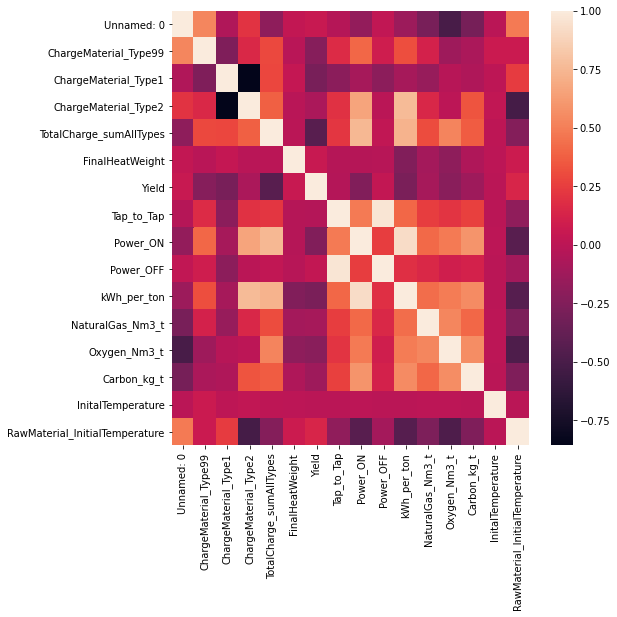

In [79]:
plt.figure(figsize = (8,8))
sns.heatmap(dados_forno.corr())
plt.show()

In [ ]:
dados_forno.corr()['kWh_per_ton'].sort_values(ascending=False)

kWh_per_ton                       1.000000
Power_ON                          0.926265
ChargeMaterial_Type2              0.764375
TotalCharge_sumAllTypes           0.731372
Carbon_kg_t                       0.550214
Oxygen_Nm3_t                      0.489020
NaturalGas_Nm3_t                  0.428266
Tap_to_Tap                        0.411530
ChargeMaterial_Type99             0.312122
Power_OFF                         0.190409
InitalTemperature                -0.001673
ChargeMaterial_Type1             -0.091763
Unnamed: 0                       -0.138534
FinalHeatWeight                  -0.252645
Yield                            -0.277767
RawMaterial_InitialTemperature   -0.438583
Name: kWh_per_ton, dtype: float64

### Quais os tipos de matéria prima utilizadas? A matéria prima mais cara e menos usada influencia na produção?
*Podemos ver que para aquecer as materias primas 1 e 3 foram utilizadas em proporções semelhantes no tipo 1. E para resfriar, o materia prima 1 foi utilizada mais vezes. Vimos também que uma matéria prima não registrada foi utilizada em 20% dos processos.*

RawMaterialHot1    7853
RawMaterialHot3    7565
Name: RawMaterialType1, dtype: int64



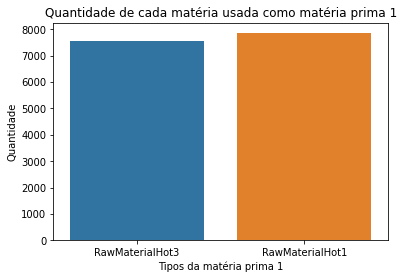

In [87]:
print(dados_forno['RawMaterialType1'].value_counts())
print()
plt.figure()
sns.countplot(x=dados_forno['RawMaterialType1'])
plt.title('Quantidade de cada matéria usada como matéria prima 1')
plt.ylabel('Quantidade')
plt.xlabel('Tipos da matéria prima 1')
plt.show()

RawMaterialCold3    3050
RawMaterialCold1    1384
Name: RawMaterialType2, dtype: int64



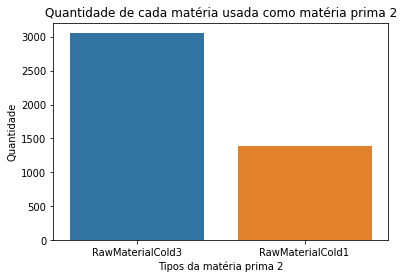

In [88]:
print(dados_forno['RawMaterialType2'].value_counts())
print()
plt.figure()
sns.countplot(x=dados_forno['RawMaterialType2'])
plt.title('Quantidade de cada matéria usada como matéria prima 2')
plt.ylabel('Quantidade')
plt.xlabel('Tipos da matéria prima 2')
plt.show()

In [ ]:
# Quantidade de vezes que uma matéria prima não registrada foi utilizada
qtd = len(dados_forno['ChargeMaterial_Type99']) - dados_forno['ChargeMaterial_Type99'].isnull().sum()
percentual = qtd/len(dados_forno['ChargeMaterial_Type99'])
print('Qtd: %d' % qtd)
print('Percentual: %.1f' % percentual)

Qtd: 2893
Percentual: 0.2


### Qual(is) variável(is) interferem no consumo de energia?
*Vimos nas células acima, que algumas variáveis possuem uma correlação significativa com a variável kWh_per_ton, e <b>cinco</b> delas de maneira especial me <b>chamaram atenção</b>, que foram: a quantidade carregada do tipo de materia prima 2 <b>[ChargeMaterial_Type2]</b>, o Kilograma de carbono injetado por tonelada <b>[Carbon_kg_t]</b>, o Metro cúbico de oxigênio por tonelada <b>[Oxygen_Nm3_t]</b>, o Metro cúbico de gás natural por tonelada <b>[NaturalGas_Nm3_t]</b> e a Temperatura inicial da materia prima <b>[RawMaterial_InitialTemperatura]</b>.* \
*Nesse passo elaboraremos um <b>modelo geral</b>, um <b>mais específico</b> com as variáveis mais importantes a partir de uma modelo baseado em árvore, e um último contendo somente essas <b>5 variáveis</b> relatadas na hipótese, contendo grande parte das variáveis que podem ser relevantes, seguiremos algumas <b>normas</b>: Quantidade de valores ausentes menor que 20%, não imputaremos dados devido a falta de informação e conhecimento sobre o domínio, treino e teste (70%,30%) e como visto anteriormente, o consumo de energia está bem relacionado com o tempo que a máquina esteve ligado, dada esse situação até um pouco óbvia, tiraremos as variáveis referente ao tempo que esteve ligada e desligada, e variáveis que não conseguimos saber o seu valor antes do momneto de término do processo.*

In [32]:
data = pd.read_csv('drive/My Drive/teste-vetta/datasets/furnace_data.csv')

data.drop(['Unnamed: 0','ChargeMaterial_Type99','ChargeMaterial_Type2','RawMaterialType2',
           'Power_ON','Power_OFF','Tap_to_Tap','FinalHeatWeight','ProductionDate'],axis=1,inplace=True)
data.dropna(axis=0,inplace=True)
data.head()

,RawMaterialType1,ChargeMaterial_Type1,TotalCharge_sumAllTypes,Yield,kWh_per_ton,NaturalGas_Nm3_t,Oxygen_Nm3_t,Carbon_kg_t,InitalTemperature,RawMaterial_InitialTemperature
0,RawMaterialHot3,178.230034,200.850909,64.228228,623.286155,4.243831,61.894745,33.286255,1729.636046,463.353003
1,RawMaterialHot3,167.424553,167.424553,77.659241,479.024764,2.063817,39.428434,23.405620,1696.228745,446.679316
2,RawMaterialHot3,126.397474,141.820797,93.501580,462.362279,2.700406,39.866427,28.714682,1735.024320,462.475441
3,RawMaterialHot3,149.145804,149.145804,85.966075,426.540126,1.880451,36.993015,19.640511,1704.849984,452.822253
4,RawMaterialHot3,149.189741,149.189741,87.291628,424.213267,1.834266,35.368881,17.568409,1681.141577,443.169066


In [33]:
data.describe()

,ChargeMaterial_Type1,TotalCharge_sumAllTypes,Yield,kWh_per_ton,NaturalGas_Nm3_t,Oxygen_Nm3_t,Carbon_kg_t,InitalTemperature,RawMaterial_InitialTemperature
count,15286.000000,15286.000000,15286.000000,15286.000000,15286.000000,15286.000000,15286.000000,1.528600e+04,15286.000000
mean,139.334140,148.697420,87.967356,427.802658,2.313589,33.116918,15.616655,2.755835e+03,482.418430
std,17.310652,9.697769,9.452952,45.801019,1.025688,4.646937,4.321817,1.313546e+05,25.519720
min,0.010984,21.369612,57.460329,91.455495,0.000000,9.385882,0.070061,-1.634802e+03,24.571750
25%,133.697490,146.027155,85.504715,403.954217,1.644368,29.907285,12.424673,1.672520e+03,468.618378
50%,145.905458,149.020983,87.527285,423.283898,2.043022,32.544820,15.262221,1.692996e+03,483.536941
75%,149.530252,151.276244,89.785697,445.155584,2.912747,35.899114,17.951504,1.713471e+03,497.577941
max,193.783697,214.198393,583.599079,1060.401909,43.272752,81.647949,58.010129,1.624192e+07,555.497066


*Aqui, <b>transformarei</b> a coluna <b>RawMaterialType1</b>, que é uma variável discreta nominal para uma variável numérica, usando como codificação: 1 para RawMaterialHot1 e 3 para RawMaterialHot3.*

In [34]:
data.RawMaterialType1.value_counts()

RawMaterialHot1    7763
RawMaterialHot3    7523
Name: RawMaterialType1, dtype: int64

In [35]:
data['RawMaterialType1_cod'] = data['RawMaterialType1'].apply(lambda x : 1 if x == 'RawMaterialHot1' else 3)
data.head()

,RawMaterialType1,ChargeMaterial_Type1,TotalCharge_sumAllTypes,Yield,kWh_per_ton,NaturalGas_Nm3_t,Oxygen_Nm3_t,Carbon_kg_t,InitalTemperature,RawMaterial_InitialTemperature,RawMaterialType1_cod
0,RawMaterialHot3,178.230034,200.850909,64.228228,623.286155,4.243831,61.894745,33.286255,1729.636046,463.353003,3
1,RawMaterialHot3,167.424553,167.424553,77.659241,479.024764,2.063817,39.428434,23.405620,1696.228745,446.679316,3
2,RawMaterialHot3,126.397474,141.820797,93.501580,462.362279,2.700406,39.866427,28.714682,1735.024320,462.475441,3
3,RawMaterialHot3,149.145804,149.145804,85.966075,426.540126,1.880451,36.993015,19.640511,1704.849984,452.822253,3
4,RawMaterialHot3,149.189741,149.189741,87.291628,424.213267,1.834266,35.368881,17.568409,1681.141577,443.169066,3


In [36]:
data.drop('RawMaterialType1',axis=1,inplace=True)

*Pronto, agora definiremos o dataset de treino e teste.*

In [37]:
X = data.drop('kWh_per_ton',axis=1)
y = data.kWh_per_ton

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

*Lembrando que usaremos a Random Forest somente para verificar as <b>variáveis</b> que foram <b>mais importantes</b> nesse modelo.*

In [38]:
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

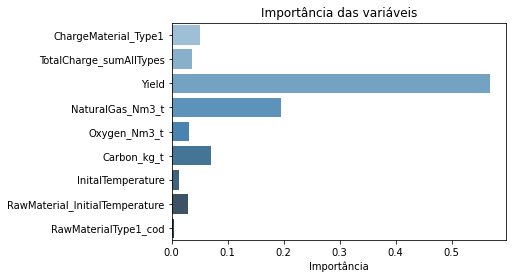

In [39]:
importancia = rf.feature_importances_

plt.figure()
plt.title("Importância das variáveis")
sns.barplot(y = X.columns,x = importancia,orient='h',
            palette='Blues_d')
plt.xlabel('Importância')
plt.show()

*Como vimos acima, as variáveis que foram mais importantes foram o total de matéria prima utilizada, o metro cúbico de gás natural por tonelada, o tempo do processo, a quantidade de carvão injetado e a quantidade de matéria prima 1. Logo, esse será nosso <b>modelo 2</b>.*

## Modelos

### Modelos para prever consumo

In [69]:
cols1 = ['ChargeMaterial_Type1', 'TotalCharge_sumAllTypes', 'NaturalGas_Nm3_t',
       'Oxygen_Nm3_t', 'Carbon_kg_t', 'InitalTemperature',
       'RawMaterial_InitialTemperature', 'RawMaterialType1_cod']

cols2 = ['ChargeMaterial_Type1', 'TotalCharge_sumAllTypes', 'NaturalGas_Nm3_t',
       'Oxygen_Nm3_t', 'Carbon_kg_t']

cols3 = ['NaturalGas_Nm3_t','Oxygen_Nm3_t', 'Carbon_kg_t','RawMaterial_InitialTemperature']

In [70]:
X1 = data[cols1]
y = data['kWh_per_ton']
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3)

modelo1 = LinearRegression()
modelo1.fit(X_train,y_train)
pred = modelo1.predict(X_test)

print('MAE: %.2f' % metrics.mean_absolute_error(y_test,pred))
print('MSE: %.2f' % metrics.mean_squared_error(y_test,pred))
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 15.80
MSE: 518.18
RMSE: 22.76


In [71]:
X2 = data[cols2]
y = data['kWh_per_ton']
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.3)

modelo2 = LinearRegression()
modelo2.fit(X_train,y_train)
pred = modelo2.predict(X_test)

print('MAE: %.2f' % metrics.mean_absolute_error(y_test,pred))
print('MSE: %.2f' % metrics.mean_squared_error(y_test,pred))
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 16.61
MSE: 528.88
RMSE: 23.00


In [72]:
X3 = data[cols3]
y = data['kWh_per_ton']
X_train, X_test, y_train, y_test = train_test_split(X3,y,test_size=0.3)

modelo3 = LinearRegression()
modelo3.fit(X_train,y_train)
pred = modelo3.predict(X_test)

print('MAE: %.2f' % metrics.mean_absolute_error(y_test,pred))
print('MSE: %.2f' % metrics.mean_squared_error(y_test,pred))
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 20.97
MSE: 1074.74
RMSE: 32.78


*Os modelos 1 e 2 se performaram melhor, com isso vamos olhar os coeficientes e buscar entender a função geradora de consumo e como podemos reduzir esse impacto no consumo de energia.*

In [73]:
coef_df = pd.DataFrame(modelo2.coef_,index=X2.columns,columns=['Coeficientes'])
coef_df

,Coeficientes
ChargeMaterial_Type1,-0.663006
TotalCharge_sumAllTypes,3.235163
NaturalGas_Nm3_t,5.234945
Oxygen_Nm3_t,-0.130339
Carbon_kg_t,3.073937


### Modelos para prever rendimento

In [60]:
cols1 = ['ChargeMaterial_Type1', 'TotalCharge_sumAllTypes', 'NaturalGas_Nm3_t',
       'Oxygen_Nm3_t', 'Carbon_kg_t', 'InitalTemperature',
       'RawMaterial_InitialTemperature', 'RawMaterialType1_cod']

cols2 = ['ChargeMaterial_Type1', 'TotalCharge_sumAllTypes', 'NaturalGas_Nm3_t',
       'Oxygen_Nm3_t', 'Carbon_kg_t']

cols3 = ['NaturalGas_Nm3_t','Oxygen_Nm3_t', 'Carbon_kg_t','RawMaterial_InitialTemperature']

In [61]:
X1 = data[cols1]
y = data['Yield']
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3)

modelo1 = LinearRegression()
modelo1.fit(X_train,y_train)
pred = modelo1.predict(X_test)

print('MAE: %.2f' % metrics.mean_absolute_error(y_test,pred))
print('MSE: %.2f' % metrics.mean_squared_error(y_test,pred))
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 4.48
MSE: 26152.76
RMSE: 161.72


In [62]:
X2 = data[cols2]
y = data['Yield']
X_train, X_test, y_train, y_test = train_test_split(X2,y,test_size=0.3)

modelo2 = LinearRegression()
modelo2.fit(X_train,y_train)
pred = modelo2.predict(X_test)

print('MAE: %.2f' % metrics.mean_absolute_error(y_test,pred))
print('MSE: %.2f' % metrics.mean_squared_error(y_test,pred))
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 2.26
MSE: 51.83
RMSE: 7.20


In [63]:
X3 = data[cols3]
y = data['Yield']
X_train, X_test, y_train, y_test = train_test_split(X3,y,test_size=0.3)

modelo3 = LinearRegression()
modelo3.fit(X_train,y_train)
pred = modelo3.predict(X_test)

print('MAE: %.2f' % metrics.mean_absolute_error(y_test,pred))
print('MSE: %.2f' % metrics.mean_squared_error(y_test,pred))
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 3.60
MSE: 101.04
RMSE: 10.05


*Os modelos 1 e 2 se performaram melhor, com isso vamos olhar os coeficientes e buscar entender a função geradora de consumo e como podemos reduzir esse impacto no consumo de energia.*

In [65]:
coef_df = pd.DataFrame(modelo2.coef_,index=X2.columns,columns=['Coeficientes'])
coef_df

,Coeficientes
ChargeMaterial_Type1,-0.029517
TotalCharge_sumAllTypes,-0.729729
NaturalGas_Nm3_t,0.304956
Oxygen_Nm3_t,-0.168351
Carbon_kg_t,0.064951


## Conclusão
Nas análises feitas acima descobrimos que os fatores que mais interferem no consumo de energia são: a quantidade carregada do tipo de materia prima 2 <b>[ChargeMaterial_Type2]</b>, o Kilograma de carbono injetado por tonelada <b>[Carbon_kg_t]</b>, o metro cúbico de oxigênio por tonelada <b>[Oxygen_Nm3_t]</b>, o metro cúbico de gás natural por tonelada <b>[NaturalGas_Nm3_t]</b> e a Temperatura inicial da materia prima <b>[RawMaterial_InitialTemperatura]</b>. E para <b>reduzir o consumo de energia</b> encontramos <b>duas alternativas</b> por meio do modelo de Regressão Linear, a <b>primeira</b> consiste em diminuir a quantidade de gás natural por tonelada <b>[NaturalGas_Nm3_t]</b> e/ou diminuir  quantidade do carbono injetado por tonelada <b>[Carbon_Kg_t]</b>, como vimos acima, <b>a cada metro cúbico de gás natural por tonelada adicionado</b> o consumo de energia elétrica <b>aumenta em 5 vezes</b> e <b>a cada kilograma de carbono injetado por tonelada</b> o consumo de energia elétrica <b>aumenta em 3 vezes</b>. \
E na <b>segunda alternativa</b> podemos optar pela <b>escolha do material 3</b> pois se escolhermos ele, teremos uma <b>diminuição de 10.8 KWh/t</b> (-5.40 - (-5.40 * 3) = 10.80) no consumo de energia elétrica (Dados encontrados no modelo matemático 1). \
No outro lado, temos que, para <b>aumentar o rendimento</b> precisamos aumentar a quantidade de gás natural por tonelada <b>[NaturalGas_Nm3_t]</b> e/ou diminuir quantidade de metro cúbico de oxigênio por tonelada <b>[Oxygen_Nm3_t]</b> adicionada. \
Para uma avaliação de <b>consumo x rendimento</b>, escolhi o método simplex da Pesquisa Operacional para exibir tal correlação, podemos pensar em como <b>maximizar o rendimento</b>, olhando somente algumas variáveis e tendo um teto máximo de consumo (Valor máximo de consumo no dataset = 1060.4). Para esse exemplo usei as variáveis dos modelos 2:
* X1 = [ChargeMaterial_Type1]
* X2 = [TotalCharge_sumAllTypes]
* X3 = [NaturalGas_Nm3_t]
* X4 = [Oxygen_Nm3_t]
* X5 = [Carbon_kg_t] 


E propus a seguinte formulação matemática através dos coeficientes encontrados pela regressão linear: \

$$
\dot{max} = -0.03X1 + 0.73X2 + 0.3X3 - 0.16X4 + 0.06X5 \\
\dot{restrição:} \\
-0.66X1 + 3.23X2 + 5.23X3 - 0.13X4 + 3.07X5 \leq 1060.4
$$

Entretanto a formulação acima possui solução ilimitada pelo método simplex, ou seja, não conseguiu uma solução ótima, reafirmando a dificuldade em ter um alta rendimento e baixo consumo, precisando assim de realizar mais análises. \
Com base nisso, pensando nos problemas citados como: redução do consumo de energia e problemas ambientais gerados, e aumento do rendimento da produção; podemos citar como sugestão dos problemas as opções apresentadas no texto: 
* Diminuição da quantidade do carbono injetado por tonelada para redução do consumo de energia
* Preferência pelo material 3 como matéria prima 1 para redução do consumo de energia
* Diminuição da quantidade de metro cúbico de oxigênio por tonelada para aumento do rendimento